In [1]:
from cv2 import imread
from itertools import product
import numpy as np
from os import listdir
import matplotlib.pyplot as plt
from os.path import isdir, join
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
dataset_path = 'C:/Users/ASHISH/Downloads/ISL Recognition/dataset_300_30' + '/'

In [3]:
img = load_img(dataset_path + 'test/1/1199.jpg')

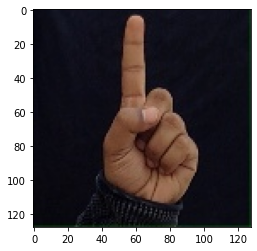

In [4]:
plt.imshow(img)

In [5]:
imread(dataset_path + 'test/1/1199.jpg').shape

(128, 128, 3)

In [6]:
# Dataset path and view possible targets
temp_path = dataset_path + 'train'
i=0
dict={}
for name in listdir(temp_path):
    if isdir(join(temp_path, name)):
        # print(name)
        dict[i]=name
        i+=1
print(dict)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'}


In [7]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [8]:
print(train)

In [9]:
train_dataset = train.flow_from_directory(dataset_path + 'train',
                                          target_size = (128, 128),
                                         batch_size = 100,
                                         class_mode = 'categorical')

validation_dataset = train.flow_from_directory(dataset_path + 'validation',
                                               target_size = (128, 128),
                                         batch_size = 100,
                                         class_mode = 'categorical')

Found 10800 images belonging to 36 classes.
Found 1080 images belonging to 36 classes.


In [10]:
print(train_dataset)

In [11]:
len(train_dataset.class_indices)

36

In [12]:
len(train_dataset.classes)

10800

In [13]:
model = Sequential()
model.add(Conv2D(32, (2, 2), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

print(model.output_shape)

# Classifier
model.add(Flatten())

print(model.output_shape)

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_dataset.class_indices), activation='softmax'))

(None, 15, 15, 64)
(None, 14400)


In [14]:
# Display model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 64)       0

In [15]:
# Add training parameters to model
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['acc'])

In [16]:
# Train
history = model.fit(train_dataset,
                    # steps_per_epoch = 3,
                    epochs=15,
                    batch_size=100,
                    validation_data=validation_dataset)

Epoch 1/15
108/108 [==============================] - 89s 822ms/step - loss: 3.1806 - acc: 0.1900 - val_loss: 1.9277 - val_acc: 0.6352
Epoch 2/15
108/108 [==============================] - 84s 782ms/step - loss: 0.8564 - acc: 0.7690 - val_loss: 0.3833 - val_acc: 0.9194
Epoch 3/15
108/108 [==============================] - 84s 780ms/step - loss: 0.2432 - acc: 0.9298 - val_loss: 0.3198 - val_acc: 0.9204
Epoch 4/15
108/108 [==============================] - 86s 797ms/step - loss: 0.1349 - acc: 0.9620 - val_loss: 0.2960 - val_acc: 0.9306
Epoch 5/15
108/108 [==============================] - 85s 784ms/step - loss: 0.1008 - acc: 0.9718 - val_loss: 0.3926 - val_acc: 0.8898
Epoch 6/15
108/108 [==============================] - 85s 783ms/step - loss: 0.0764 - acc: 0.9755 - val_loss: 0.3429 - val_acc: 0.9250
Epoch 7/15
108/108 [==============================] - 85s 791ms/step - loss: 0.0722 - acc: 0.9769 - val_loss: 0.2384 - val_acc: 0.9306
Epoch 8/15
108/108 [==============================] - 9

In [17]:
model_filename = 'isl.h5'

In [18]:
save_model(model, model_filename)

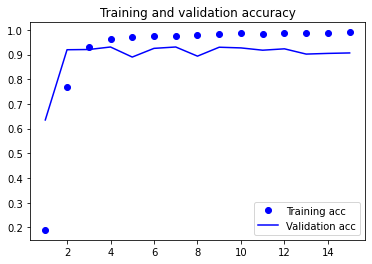

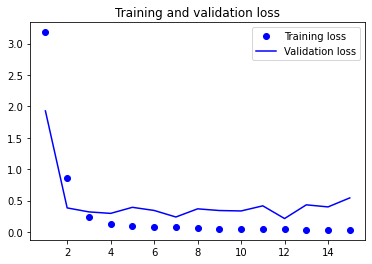

In [19]:
# Plot results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Accuracy Curves')

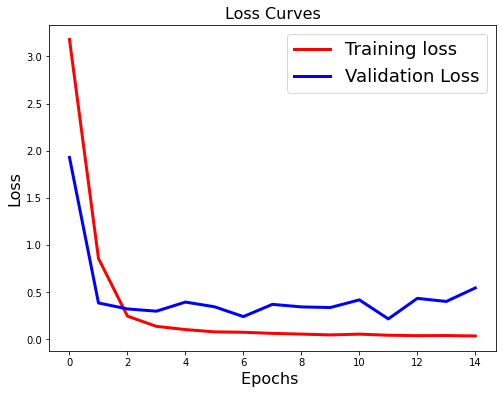

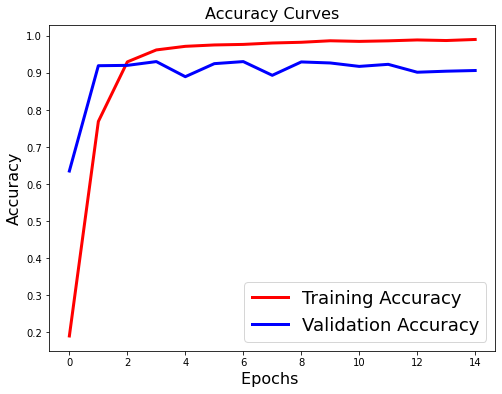

In [20]:
# Loss Curves

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves

plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [21]:
model = load_model(model_filename)

In [22]:
dir_path = dataset_path + 'All'

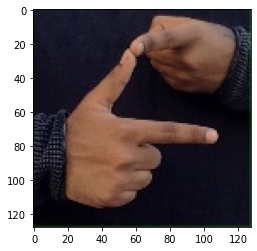

J


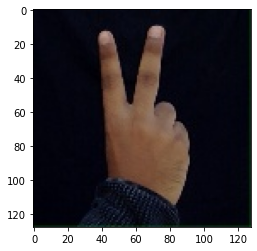

2


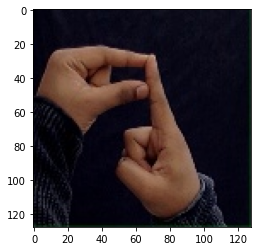

T


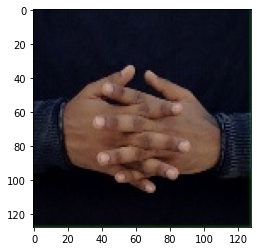

W


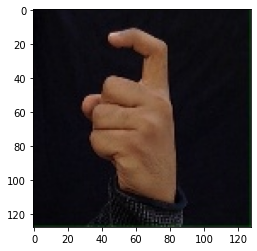

7


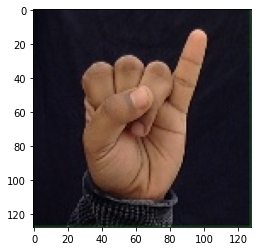

6


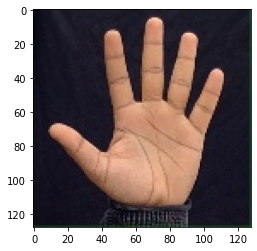

5


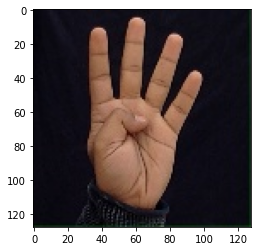

4


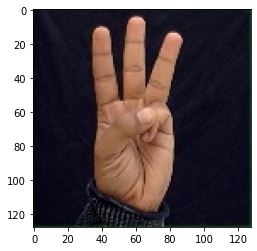

3


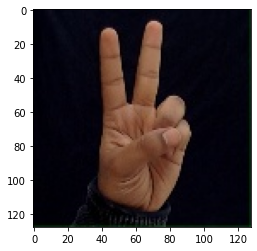

2


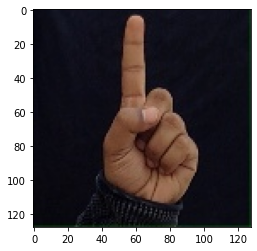

1


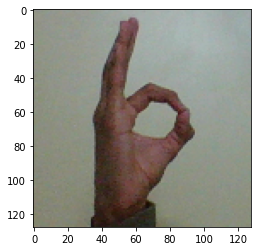

0


In [23]:
for i in listdir(dir_path):
    img = load_img(dir_path + '/' + i, target_size = (128,128,3))
    plt.imshow(img)
    plt.show()
    
    x = img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])

    val = model.predict(images)
    # print(val)
    print(dict[np.argmax(val)])

In [24]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    """
    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
target_names = []
for key in validation_dataset.class_indices:
    target_names.append(key)

print(target_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [26]:
test = ImageDataGenerator(rescale = 1/255)

test_dataset = test.flow_from_directory(dataset_path + 'test',
                                               target_size = (128, 128),
                                         batch_size = 3,
                                         shuffle=False,
                                         class_mode = 'categorical')

Found 720 images belonging to 36 classes.


In [27]:
test_dataset.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'A': 10,
 'B': 11,
 'C': 12,
 'D': 13,
 'E': 14,
 'F': 15,
 'G': 16,
 'H': 17,
 'I': 18,
 'J': 19,
 'K': 20,
 'L': 21,
 'M': 22,
 'N': 23,
 'O': 24,
 'P': 25,
 'Q': 26,
 'R': 27,
 'S': 28,
 'T': 29,
 'U': 30,
 'V': 31,
 'W': 32,
 'X': 33,
 'Y': 34,
 'Z': 35}

In [28]:
(test_dataset.classes)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 11

Confusion Matrix
Confusion matrix, without normalization


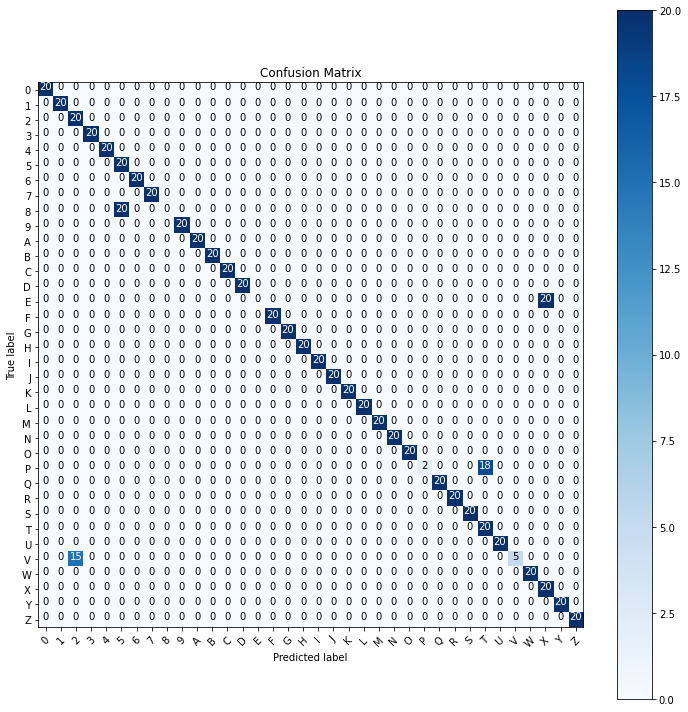

In [29]:
#Confution Matrix 

Y_pred = np.argmax(model.predict(test_dataset), axis=1)
# y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_dataset.classes, Y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [30]:
print(Y_pred)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  5  5  5  5  5  5  5  5
  5  5  5  5  5  5  5  5  5  5  5  5  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13
 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 33 33 33 33 33 33 33 33
 33 33 33 33 33 33 33 33 33 33 33 33 15 15 15 15 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16

In [31]:
#Print Classification Report

print('Classification Report')
print(classification_report(test_dataset.classes, Y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.57      1.00      0.73        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       0.50      1.00      0.67        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.00      0.00      0.00        20
           9       1.00      1.00      1.00        20
           A       1.00      1.00      1.00        20
           B       1.00      1.00      1.00        20
           C       1.00      1.00      1.00        20
           D       1.00      1.00      1.00        20
           E       0.00      0.00      0.00        20
           F       1.00      1.00      1.00        20
           G       1.00      1.00      1.00        20
     

c:\users\ashish\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ashish\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\ashish\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,